## Initialization

### Imports

In [29]:
import os

import pandas as pd
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Read data with xarray

In [7]:
filename = "download.grib"
home_dir = os.path.expanduser('~')
file_path = os.path.join(home_dir, 'Code/star-struck/data/', filename)

ds = xr.open_dataset(file_path, engine='cfgrib')

<xarray.Dataset>
Dimensions:     (time: 32, step: 24, latitude: 70, longitude: 103)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2022-06-30 2022-07-01 ... 2022-07-31
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 ...
  * latitude    (latitude) float64 41.7 41.6 41.5 41.4 ... 35.1 35.0 34.9 34.8
  * longitude   (longitude) float64 19.37 19.47 19.57 ... 29.37 29.47 29.57
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (time, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-08-27T17:15 GRIB to CDM+CF via cfgrib-0.9.1...

## Daily mean temperature

### Group by and reduce by mean step

In [20]:
temperature_arr = ds["t2m"]
mean_daily_temperature = temperature_arr.groupby("time").mean("step")

### Reduce by mean time

In [35]:
mean_temperature = mean_daily_temperature.mean(dim="time")

### Plot a map

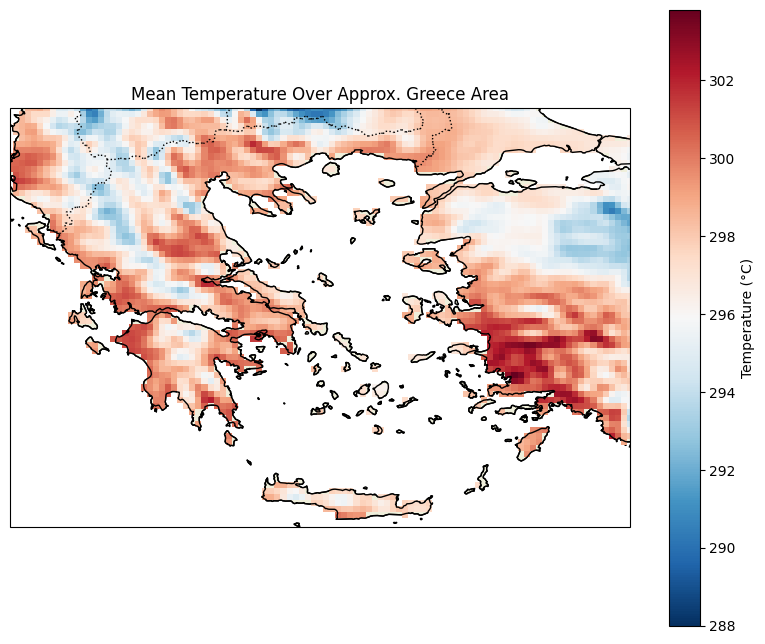

In [38]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))
ax.set_extent([19.37, 29.57, 34.8, 41.7])  # [lon_min, lon_max, lat_min, lat_max] covering approx. Greece area

# Plot the mean temperature data
mean_temperature.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'label': 'Temperature (°C)'})

# Adding coastlines and land features for better visualization
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Mean Temperature Over Approx. Greece Area')

plt.show()